# Network Optimization

### Introduction

Use "who_talks_to_whom.xlsx" to do an organizational network analysis report based on calculating centrality measures (eigenvalue) and clustering coefficients and gaining some insight into the network. The objective is to identify who are the leaders and opinion-makers in the cohort, and any other qualitative insights.

The file "who_talks_to_whom.xlsx" contains information fromn a previous cohort. Students were asked to write down the number of emails they exchanged with other members of the cohort.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the data and fix errors
sent_emails = pd.read_excel('who_talks_to_whom.xlsx', sheet_name='Sent', index_col=0).fillna(0).apply(pd.to_numeric, errors='coerce')
received_emails = pd.read_excel('who_talks_to_whom.xlsx', sheet_name='Received', index_col=0).fillna(0).apply(pd.to_numeric, errors='coerce')

# Visualize first five rows of the datasets
print(sent_emails.head())
print(received_emails.head())

        1    2    3    4    5    6    7    8    9    10  ...   72   73   74  \
Nodes                                                    ...                  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      2.0  0.0  0.0  1.0  3.0  0.0  5.0  0.0  0.0  0.0  ...  0.0  2.0  4.0   
3      0.0  0.0  0.0  1.0  0.0  2.0  0.0  0.0  7.0  0.0  ...  5.0  0.0  0.0   
4      0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  2.0  1.0   
5      0.0  3.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  ...  0.0  2.0  3.0   

        75   76   77    78   79   80   81  
Nodes                                      
1      1.0  0.0  5.0   1.0  1.0  5.0  2.0  
2      0.0  0.0  0.0   0.0  0.0  0.0  0.0  
3      0.0  3.0  0.0  11.0  2.0  2.0  0.0  
4      5.0  1.0  0.0   0.0  3.0  0.0  1.0  
5      0.0  0.0  3.0   0.0  0.0  0.0  0.0  

[5 rows x 81 columns]
        1    2    3    4    5    6    7    8    9    10  ...   72   73   74  \
Nodes                               

In [2]:
# Both matrices are supposed to be identical 
equal = sent_emails.equals(received_emails)
print("Are the matrices identical?", equal)

Are the matrices identical? False


In [3]:
# Find the differences between the data frames
df_diff = sent_emails.compare(received_emails)
print(df_diff)

        1          2          3           4           5         ...   77  \
      self other self other self other  self other  self other  ... self   
Nodes                                                           ...        
4      NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
6      NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
10     NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
12     NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
13     NaN   NaN  NaN   NaN  NaN   NaN   3.0   2.0   NaN   NaN  ...  3.0   
15     NaN   NaN  NaN   NaN  NaN   NaN  15.0  10.0   NaN   NaN  ...  NaN   
17     NaN   NaN  NaN   NaN  1.0   2.0  15.0  10.0   NaN   NaN  ...  NaN   
20     NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
22     NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
28     NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...  NaN   
30     NaN  

In [4]:
# Count of differing cells
count = (df_diff.notna().sum().sum())
print("Count of differing cells:", count)

Count of differing cells: 545


In [5]:
new_dataframe = sent_emails.copy()

# For each combination of row and column, I retrieve the values from the corresponding positions in both sent_emails and received_emails dataframes
for row in sent_emails.index:
    for column in sent_emails.columns:
        value_sent_file = sent_emails.loc[row, column]
        value_received_file = received_emails.loc[row, column]
        higher_value = max(value_sent_file, value_received_file) # keep higher vale
        # Update the corresponding position in the new dataframe with the calculated higher value
        new_dataframe.loc[row, column] = higher_value

print("New Data Frame with identical data and higher values for non-identical cells:\n")
print(new_dataframe)

New Data Frame with identical data and higher values for non-identical cells:

        1    2    3    4    5    6    7    8     9    10  ...    72   73   74  \
Nodes                                                     ...                   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0  0.0  0.0   
2      2.0  0.0  0.0  1.0  3.0  0.0  5.0  0.0   0.0  0.0  ...   0.0  2.0  4.0   
3      0.0  0.0  0.0  1.0  0.0  2.0  0.0  0.0   7.0  0.0  ...   5.0  0.0  0.0   
4      0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   0.0  1.0  ...   0.0  2.0  1.0   
5      0.0  3.0  0.0  0.0  0.0  0.0  2.0  0.0   0.0  0.0  ...   0.0  2.0  3.0   
...    ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   ...  ...  ...   
77     3.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0   0.0  0.0  ...   0.0  0.0  0.0   
78     4.0  0.0  5.0  1.0  0.0  2.0  0.0  0.0   1.0  0.0  ...  20.0  1.0  0.0   
79     0.0  0.0  0.0  8.0  0.0  0.0  1.0  0.0   3.0  0.0  ...   0.0  2.0  0.0   
80     4.0  0.0  2.0  2.0  0.0

C:\Users\anar3\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


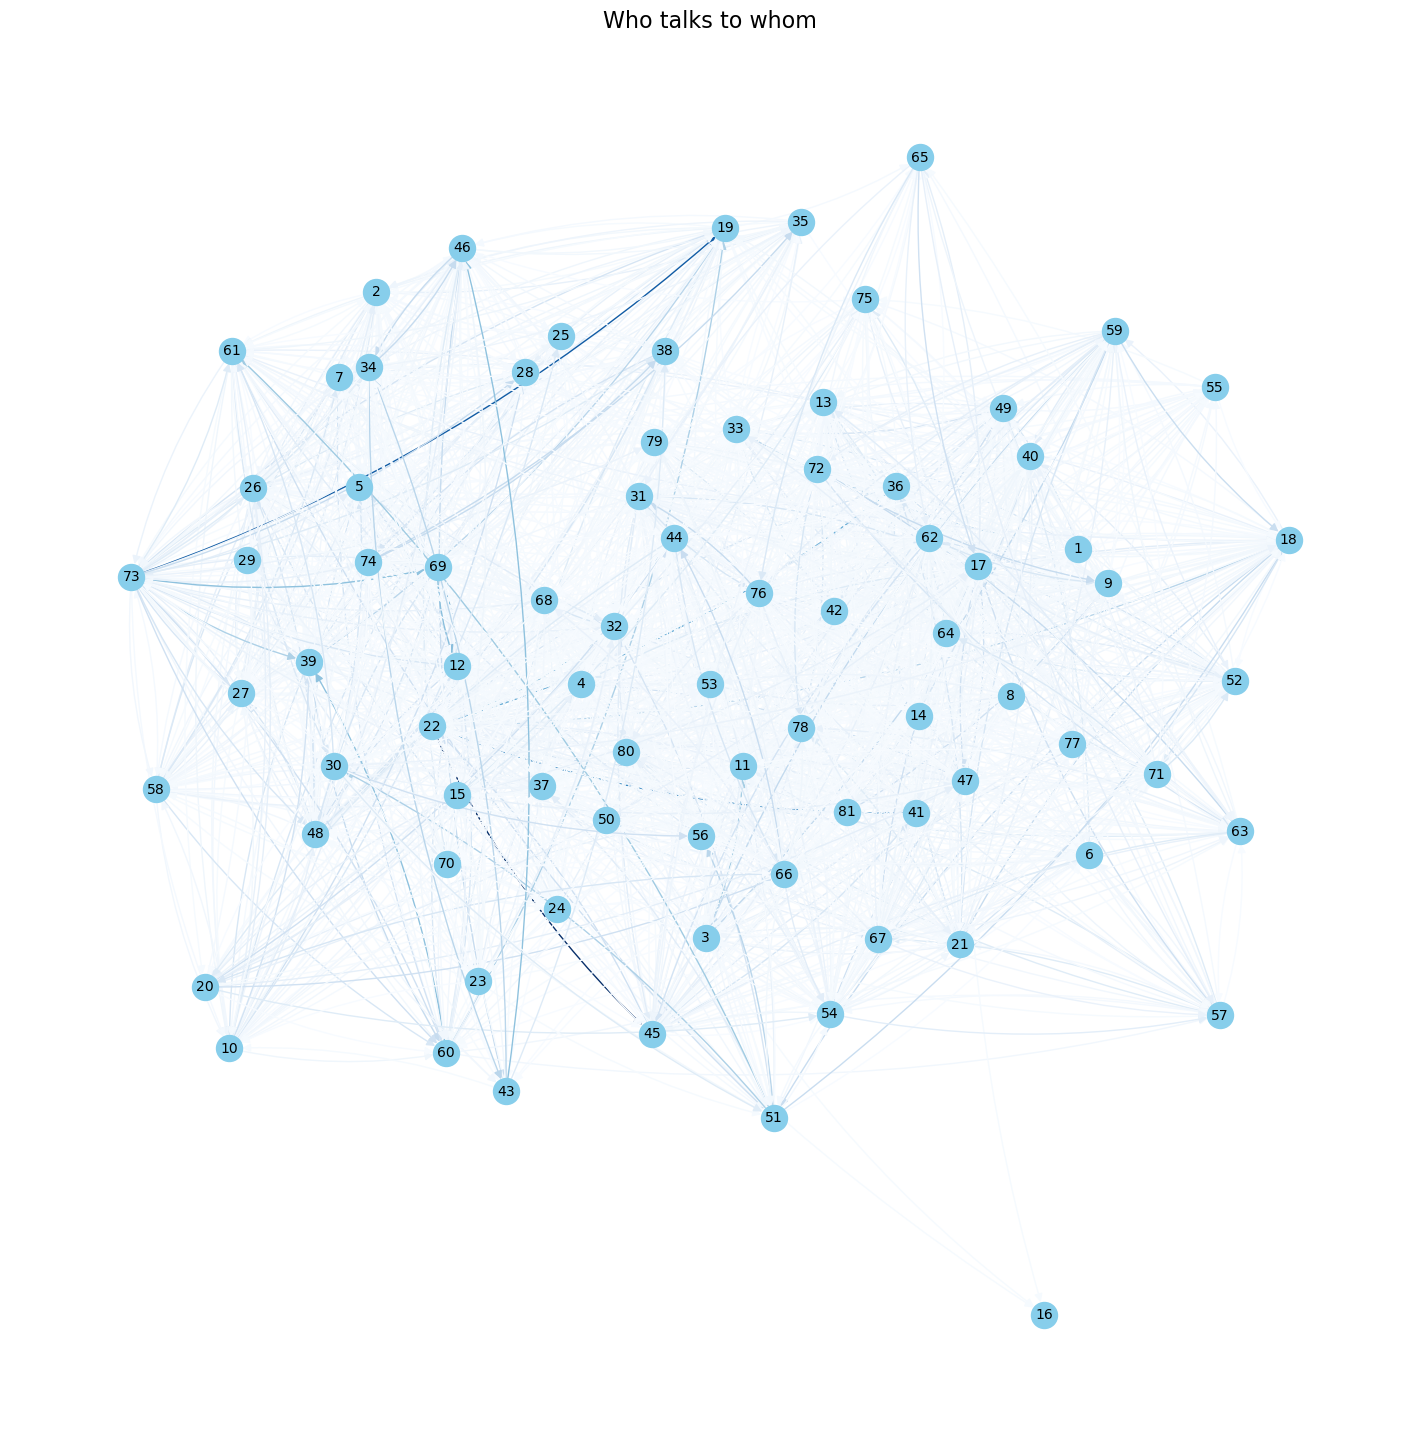

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph 
G = nx.DiGraph()

# Add edges to the graph when weight does not equal zero
# Check that index is not equal to column to avoid self-loops
for index, row in new_dataframe.iterrows():
    for column, weight in row.items():
        if weight != 0 and index != column:
            G.add_edge(index, column, weight=weight)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Normalize the weights
edge_weights = [data['weight'] for source, target, data in G.edges(data=True)]
max_weight = max(edge_weights)
normalized_weights = [weight / max_weight for weight in edge_weights]

# Plot network
plt.figure(figsize=(14, 14))
pos = nx.kamada_kawai_layout(G)  # Specify layout
nx.draw(G, 
        pos=pos,
        with_labels=True, 
        font_size=10, 
        node_size=350, 
        node_color='skyblue', 
        edge_color=normalized_weights, 
        cmap=plt.cm.Blues, 
        font_color='black', 
        arrowsize=12, 
        connectionstyle="arc3,rad=0.1", 
        edge_cmap=plt.cm.Blues
       )

plt.title('Who talks to whom', fontsize=16)
plt.show()

In [7]:
degree_centrality = nx.degree_centrality(G)
print("Degree centrality:\n\n", degree_centrality, "\n")
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector centrality:\n\n", eigenvector_centrality, "\n")
clustering_coefficient = nx.clustering(G)
print("Clustering coefficient:\n\n", clustering_coefficient, "\n")

leaders_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
leaders_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
leaders_cluster = sorted(clustering_coefficient, key=clustering_coefficient.get, reverse=True)[:5]

print("Leaders based on Degree Centrality:", leaders_degree)
print("Leaders based on Eigenvector Centrality:", leaders_eigenvector)
print("Nodes with higher Clustering Coefficient:", leaders_cluster)

average_cluster_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_cluster_coefficient)

Degree centrality:

 {1: 0.5625, 13: 0.7625000000000001, 14: 0.7125, 18: 0.7375, 22: 1.0875000000000001, 25: 0.36250000000000004, 33: 0.6000000000000001, 36: 0.8500000000000001, 40: 0.8875000000000001, 41: 0.7625000000000001, 42: 0.7000000000000001, 47: 0.9375, 49: 0.6375000000000001, 50: 0.48750000000000004, 52: 0.6625000000000001, 55: 0.3875, 57: 0.45, 64: 0.7125, 75: 0.36250000000000004, 77: 0.47500000000000003, 78: 0.9625, 79: 0.7125, 80: 0.75, 81: 0.5125000000000001, 2: 0.6000000000000001, 4: 0.8250000000000001, 5: 0.5875, 7: 0.525, 12: 0.8375, 19: 0.6625000000000001, 24: 0.5, 26: 0.8250000000000001, 27: 0.6375000000000001, 28: 0.47500000000000003, 29: 0.4, 32: 1.05, 35: 0.45, 37: 0.8250000000000001, 38: 0.5750000000000001, 39: 0.5750000000000001, 46: 0.65, 48: 0.7250000000000001, 53: 0.8375, 58: 0.6000000000000001, 60: 0.4625, 61: 0.6375000000000001, 68: 0.9, 69: 0.7250000000000001, 73: 0.8625, 74: 0.6375000000000001, 3: 0.75, 6: 0.4625, 9: 0.65, 11: 0.9125000000000001, 16: 0.037

In [8]:
# Some extra network information
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())
print("Isolated Nodes:", [node for node, degree in G.degree() if degree == 0])

Number of nodes: 81
Number of edges: 2055
Nodes: [1, 13, 14, 18, 22, 25, 33, 36, 40, 41, 42, 47, 49, 50, 52, 55, 57, 64, 75, 77, 78, 79, 80, 81, 2, 4, 5, 7, 12, 19, 24, 26, 27, 28, 29, 32, 35, 37, 38, 39, 46, 48, 53, 58, 60, 61, 68, 69, 73, 74, 3, 6, 9, 11, 16, 17, 21, 31, 45, 51, 54, 56, 59, 62, 63, 67, 72, 76, 10, 15, 20, 44, 66, 23, 8, 43, 71, 70, 34, 65, 30]
Edges: [(1, 13), (1, 14), (1, 18), (1, 22), (1, 25), (1, 33), (1, 36), (1, 40), (1, 41), (1, 42), (1, 47), (1, 49), (1, 50), (1, 52), (1, 55), (1, 57), (1, 64), (1, 75), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (13, 4), (13, 6), (13, 7), (13, 8), (13, 11), (13, 14), (13, 17), (13, 18), (13, 21), (13, 22), (13, 31), (13, 36), (13, 40), (13, 41), (13, 44), (13, 45), (13, 47), (13, 49), (13, 50), (13, 52), (13, 54), (13, 59), (13, 62), (13, 63), (13, 64), (13, 65), (13, 66), (13, 67), (13, 71), (13, 76), (13, 77), (13, 78), (13, 79), (13, 81), (14, 1), (14, 4), (14, 6), (14, 8), (14, 18), (14, 21), (14, 33), (14, 38), (14, 42)

### Conclusions & Insights

The excel file ‘who_talks_to_whom.xlsx’ contains two sheets, one showing the emails sent in-between classmates and another one containing the emails received. Something important to consider for this analysis is that the sheet ‘received’ is not the transpose of ‘sent’, nor vice versa. The reason for this is because the entries in the ‘sent’ worksheet represent number of emails sent by nodes in the rows to nodes in the columns, whereas ‘received’ worksheet represents the number of emails received by nodes in the columns from nodes in the rows.

Firstly, the excel file had some empty cells and dashes which were not interpretable by Jupyter, hence we converted all these values to zero so that Jupyter could read those cells as zero messages sent or received. Then, we analyzed the file and checked whether the two sheets were indeed equal. We saw this was not the case, and 545 cells had discrepancies among sheets. To overcome this issue, we assumed that it is more likely that someone forgets to keep track of an email (i.e. underestimate) rather than keep track of emails that were never sent (i.e. overestimate). For this reason, whenever there was a discrepancy between a value in a specific row and column in between the two sheets, we took the one with the higher value and kept the rest equal. In other words, we assumed that the sheet with the higher value cell is correct, and they may have forgotten to keep track of those emails on the other sheet.

This left us with a new, clean data frame used to create the directed and weighted graph. The direction of the arrow specifies from who to who the email was sent; as it may not be the same the number of emails that classmate X sent to classmate Y, than the number of emails that Y sent to X. Moreover, the number of emails is shown by the color of the edges (i.e. the darker, the more emails sent / received). We decided to normalize the weights to ensure that all edge weights are on a consistent scale. This prevents edges with large weights from dominating the visualization, making it easier to observe the relative differences in weights. Finally, as part of our analysis, we decided to get rid of self-loops (if any). We took this decision as we believe self-loops may overload the graph and are unrelated to the topic (i.e. even if one of the classmates has sent X emails to himself, it does not convert him into a leader or opinion-maker).

After building the organizational network, we computed centrality measures and clustering coefficients to gain some insights from the network. Degree centrality measures the number of connections each individual has in the network. Higher degree centrality indicates individuals who are more connected and hence the more central the node tends to be. Our top five nodes based on degree centrality are [22, 32, 62, 78, 47]. Eigenvector centrality considers both the number and the quality of the connections, giving higher scores to nodes connected to other well-connected nodes. It is a measure of the influence a node has on a network. Our top five nodes based on eigenvector centrality are [78, 22, 40, 31, 62].

Nodes 22, 62 and 78 appear in the top five for both degree and eigenvector centrality, indicating they are leaders with high influence in the network. Nodes with high degree centrality but not that high eigenvector centrality (32 or 47) are central in the network, allowing direct collaboration and indicating their importance in information exchange, despite they may not act as opinion-makers (they may exchange emails with lots of people from the cohort although not a lot of emails). On the other side, nodes with high eigenvector centrality (78, 22, 40, 31 and 62) act as opinion-makers, influencing others in the network (they are not only connected with a lot of people from the cohort, but they exchange high number of emails).

The clustering coefficient measures the extent to which nodes in a graph tend to cluster together and provides insights into the cohesion of the network. Nodes with high clustering coefficient (16, 59, 65, 63, or 28) suggest cohesive subgroups within the network. As an example, node 16, whose in-neighbors are 3, 17, and 22; has a clustering coefficient of 1.0 because all pairs of its in-neighbors (3, 17), (3, 22), and (17, 22) are connected to each other, creating what is called a clique cluster.
Finally, the average clustering coefficient for our network is 0.53. As the clustering coefficient goes from 0 to 1, we can say that our network is not very sparse nor highly clustered. An average clustering coefficient of 0.53 indicates a moderate level of clustering, which could be due to the presence of tightly connected groups of nodes.

---

---

### Introduction

The data qatar_tsp.txt contains latitude and longitude data of 194 cities from Qatar. Calculate the distance matrix. The x and y-cordinates are the latitude and longitude in decimal form multiplied by 1000. EUC_2D means take these as Cartesian co-ordinates. Can also use haversine treating them as longitude and latitude.

I will start by plotting the latitude and longitude as a scatter plot.

In [10]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import matplotlib.pyplot as plt
import math
from itertools import combinations
import folium

In [11]:
file_path = "qatar_tsp.txt"

# Read the file
with open(file_path, 'r') as file:
    text = file.read()

# Use regular expressions to extract data 
name = re.search(r"NAME\s*:\s*(\S+)", text).group(1)
dimension = int(re.search(r"DIMENSION\s*:\s*(\d+)", text).group(1))

# Extract the data
node_coord_section = re.search(r"NODE_COORD_SECTION(.+)", text, re.DOTALL).group(1).strip()
nodes_data = [line.split() for line in node_coord_section.split('\n') if line.strip()]

# Create a Dataframe 
df = pd.DataFrame(nodes_data, columns=['Node', 'Latitude', 'Longitude'])
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
# delete the last row of the Dataframe "EOF"
df = df.drop(df.index[-1])
# Print the Dataframe 
print(f"Name: {name}")
print(f"Dimension: {dimension}")
print("\nNode Coordinates:")
df

Name: qa194
Dimension: 194

Node Coordinates:


,Node,Latitude,Longitude
0,1,24748.3333,50840.0000
1,2,24758.8889,51211.9444
2,3,24827.2222,51394.7222
3,4,24904.4444,51175.0000
4,5,24996.1111,51548.8889
...,...,...,...
189,190,26123.6111,51169.1667
190,191,26123.6111,51222.7778
191,192,26133.3333,51216.6667
192,193,26133.3333,51300.0000


In [12]:
df['coord'] = list(zip(df['Latitude']*0.001, df['Longitude']*0.001))
capitals = []
coordinates = {}

# Create a dictionary to store coordinates and convert the multiplied coordinates back to their original form
coordinates = {int(node): (float(lat)*0.001, float(lon)*0.001) for node, lat, lon in zip(df['Node'], df['Latitude'], df['Longitude'])}

for node in df['Node']:
    capitals.append(int(node))

In [13]:
def distance(city1, city2):
    lat1,long1 = coordinates[city1]
    lat2,long2 = coordinates[city2]
# Convert latitude and longitude to
# spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

# phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

# theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

# Compute spherical distance from spherical coordinates.

# For two locations in spherical coordinates
# (1, theta, phi) and (1, theta', phi')
# cosine( arc length ) =
# sin phi sin phi' cos(theta-theta') + cos phi cos phi'
# distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

# Remember to multiply arc by the radius of the earth
# in your favorite set of units to get length.
    return arc

In [14]:
# Calculate distances between all combinations of nodes2)}
dist = {(c1, c2): distance(c1, c2) for c1, c2 in combinations(capitals, 2)}

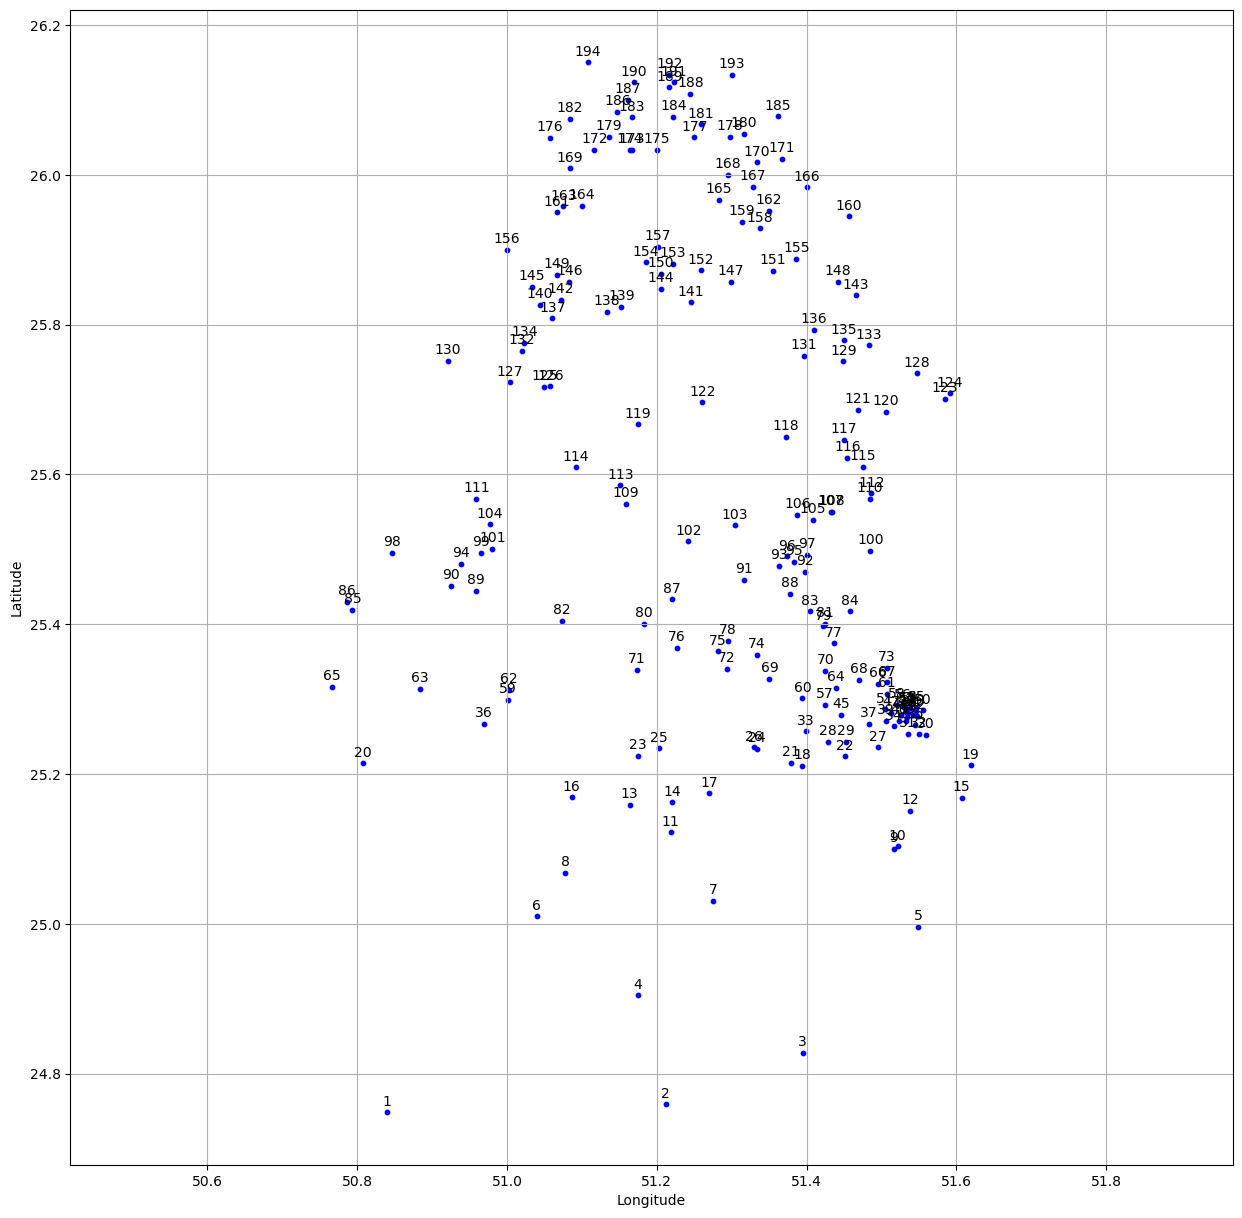

In [15]:
# Extract latitude and longitude from 'coord' column
latitude, longitude = zip(*df['coord'])

# Set the size of the figure
plt.figure(figsize=(15, 15)) # Using a square figure for equal axis proportions

# Plot the points with smaller size
plt.scatter(longitude, latitude, marker='o', color='blue', s=10)  # Adjust 's' for point size

# Annotate each point with the corresponding node number
for i, node in enumerate(df['Node']):
    plt.annotate(str(node), (longitude[i], latitude[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')  # This ensures that the scale of the x and y axes are equal
plt.show()

Now, I connected with the Python interface of Gurobi and found an optimal tour using the sub-tour elimination integer programming formulation.

In [17]:
import gurobipy as gp
from gurobipy import GRB

# tested with Python 3.7 & Gurobi 9.0.0

m = gp.Model()

# Variables: is city 'i' adjacent to city 'j' on the tour?
vars = m.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='x')

# Create a copy of the keys to avoid RuntimeError
keys_copy = list(vars.keys())

# Symmetric direction: Copy the object
for i, j in keys_copy:
    vars[j, i] = vars[i, j] 

# Constraints: two edges incident to each city
cons = m.addConstrs(vars.sum(c, '*') == 2 for c in capitals)

Restricted license - for non-production use only - expires 2025-11-24


In [18]:
# Callback - use lazy constraints to eliminate sub-tours
# define a callback function to eliminate subtours
def subtourelim(model, where):
    if where == GRB.Callback.MIPSOL:
        # make a list of edges selected in the solution
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        # find the shortest cycle in the selected edge list
        tour = subtour(selected)
        if len(tour) < len(capitals):
            # add subtour elimination constr. for every pair of cities in subtour
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Given a tuplelist of edges, find the shortest subtour
def subtour(edges):
    unvisited = capitals[:] # Initializes a list to keep track of which nodes have been visited
    cycle = capitals[:] # Dummy - guaranteed to be replaced
    while unvisited:  # iterate through all the possible pairs of nodes (edges)
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # New shortest subtour
    return cycle

In [19]:
#attach the vars dictionary to the gurobi model
m._vars = vars
#enable the use of lazy constraints 
m.Params.lazyConstraints = 1
#starts the optimisation process
#pass the subtour_elimination function as a callback to be called by Gurobi when searching for the optimal solution 
m.optimize(subtourelim)

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads


User-callback calls 6, time in user-callback 0.00 sec


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [58]:
# Retrieve solution
# Extract the optimal tour, retrieve the solution values for all variables 
vals = m.getAttr('x', vars)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)
#construct the tour from the solution
tour = subtour(selected)
assert len(tour) == len(capitals)
print('Optimal tour:', tour)
print('Total distance:', m.objVal*6371.0) # Calculate the distance in kilometers

Optimal tour: [1, 4, 2, 3, 5, 9, 10, 12, 15, 19, 30, 32, 31, 35, 38, 41, 44, 42, 50, 49, 55, 54, 46, 48, 52, 53, 56, 58, 43, 40, 34, 39, 47, 51, 61, 67, 73, 66, 68, 64, 70, 77, 84, 81, 79, 83, 88, 92, 97, 95, 96, 93, 91, 103, 102, 109, 113, 114, 119, 122, 118, 106, 105, 107, 108, 100, 110, 112, 115, 116, 117, 121, 120, 123, 124, 128, 133, 135, 129, 131, 136, 143, 148, 160, 166, 171, 185, 193, 188, 191, 192, 189, 184, 183, 186, 187, 190, 194, 182, 176, 169, 163, 161, 164, 172, 179, 174, 173, 175, 177, 181, 178, 180, 170, 167, 168, 165, 159, 158, 162, 155, 151, 147, 152, 141, 144, 150, 153, 157, 154, 139, 138, 142, 146, 149, 156, 145, 140, 137, 134, 132, 126, 125, 127, 130, 111, 104, 101, 99, 94, 89, 90, 98, 86, 85, 65, 20, 63, 36, 59, 62, 82, 71, 80, 87, 76, 75, 78, 72, 74, 69, 60, 57, 45, 37, 27, 22, 29, 28, 33, 18, 21, 24, 26, 17, 7, 11, 14, 25, 23, 13, 16, 8, 6]
Total distance: 992.117662345226


Finally, I will plot the resulting tour on the scatter plot.

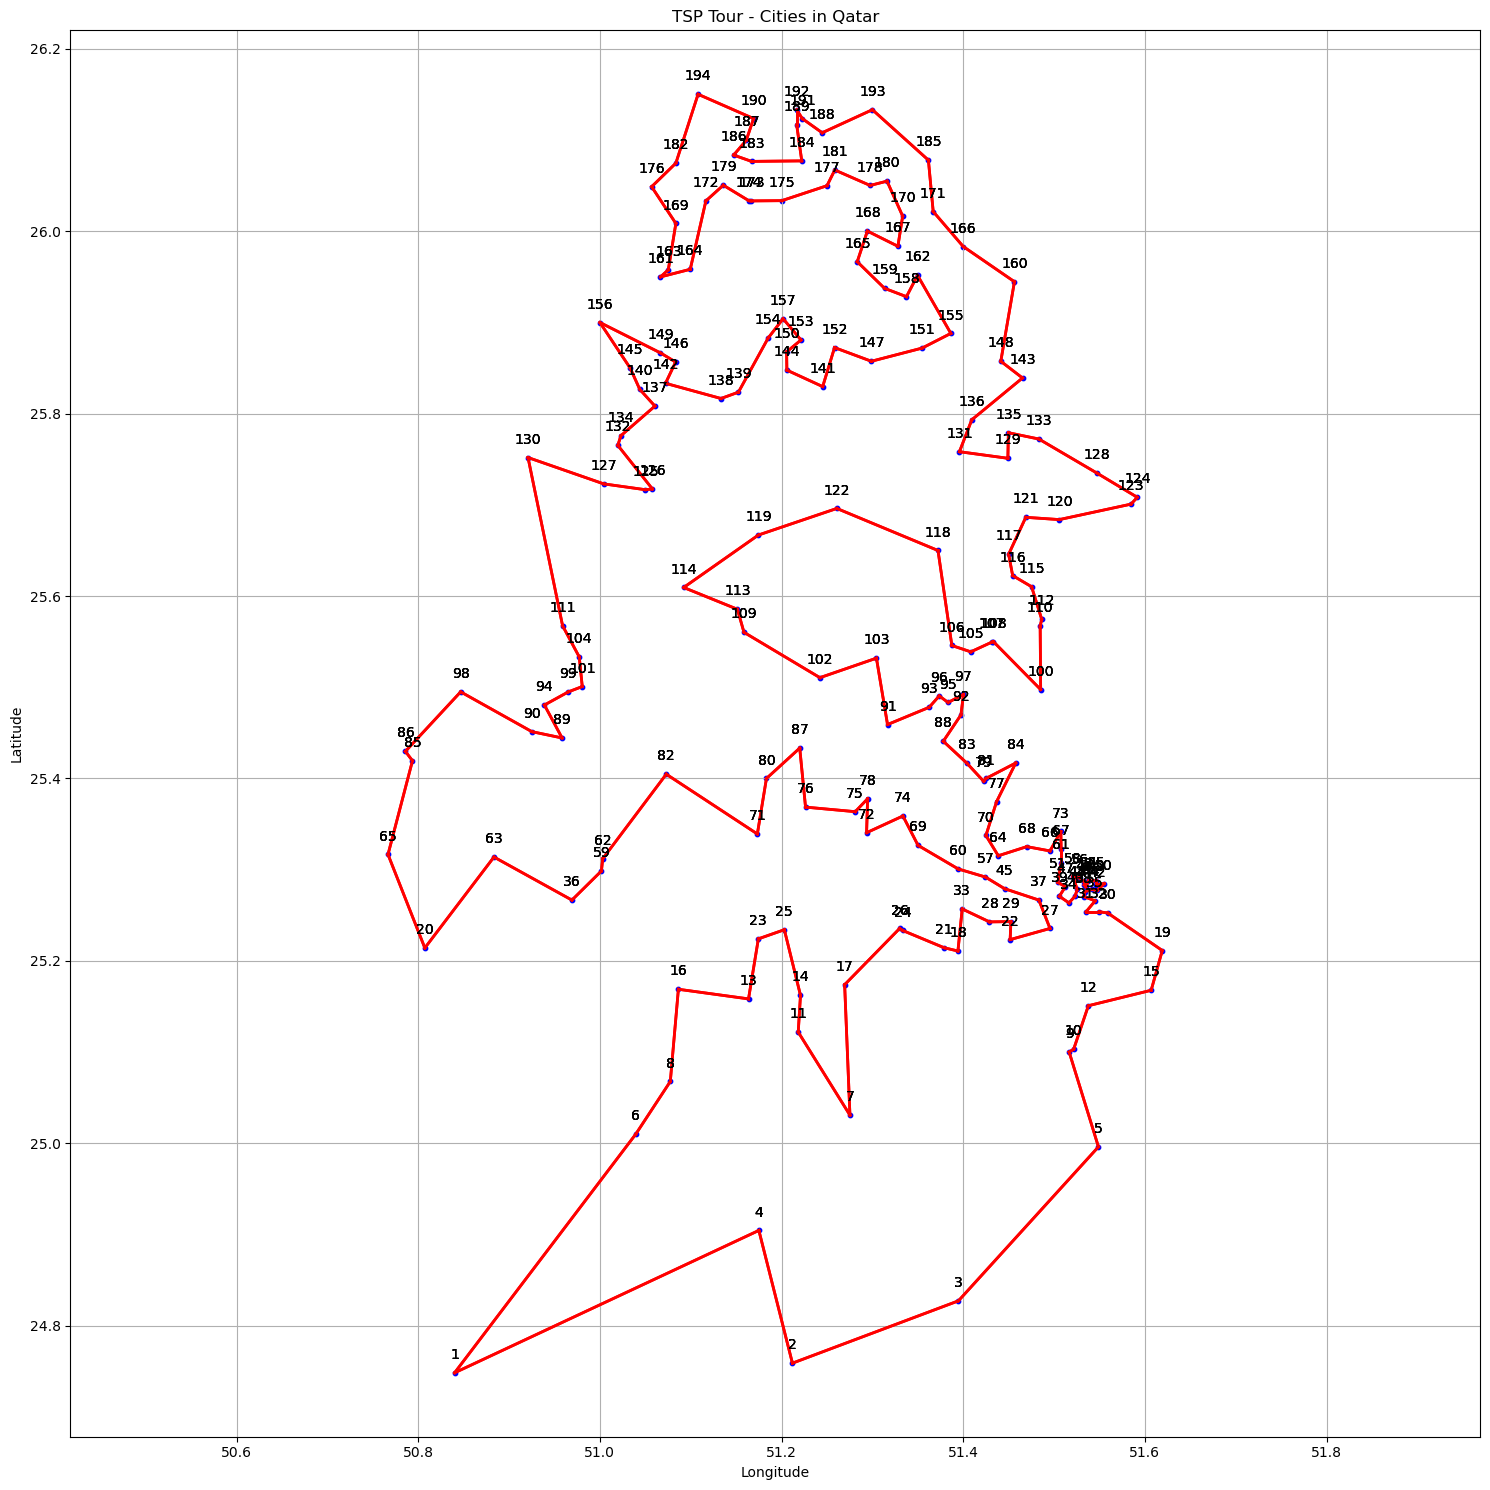

In [59]:
# Size of the figure
plt.figure(figsize=(15, 15))

# Divide longitude and latitude values by 1000
df['Longitude'] /= 1000
df['Latitude'] /= 1000

# Plot the points and connections
plt.scatter(df['Longitude'], df['Latitude'], marker='o', color='blue', label='Nodes', s=10)  # Adjust 's' for point size

# Plot the selected connections
for (i, j) in selected:
    i, j = int(i), int(j)  # Convert indices to integers
    plt.plot([df.loc[i-1, 'Longitude'], df.loc[j-1, 'Longitude']],
             [df.loc[i-1, 'Latitude'], df.loc[j-1, 'Latitude']], color='red', linestyle='-', linewidth=2)

    # Add point numbers
    plt.annotate(str(i), (df.loc[i-1, 'Longitude'], df.loc[i-1, 'Latitude']), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(str(j), (df.loc[j-1, 'Longitude'], df.loc[j-1, 'Latitude']), textcoords="offset points", xytext=(0,10), ha='center')

# Axis labels and legend
plt.title('TSP Tour - Cities in Qatar')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(50.5/1000, 52.0/1000)  # Adjust the xlim accordingly
plt.grid(True) 
plt.axis('equal')  # Equal aspect ratio
plt.tight_layout()

# Display the plot
plt.show()

In [60]:
import folium

# Create a list of coordinates for Qatar (adjust as needed)
qatar_coordinates = [25.276987, 51.520008]

# Map the solution on the earth map
map = folium.Map(location=qatar_coordinates, zoom_start=8)

points = []

# Assuming 'tour' is a list of cities in the tour
for city in tour:
    points.append(coordinates[city])

# Close the loop by adding the first point at the end
points.append(points[0])

folium.PolyLine(points).add_to(map)

# Display the map
map

In [61]:
m.dispose()
gp.disposeDefaultEnv()

Freeing default Gurobi environment
